In [1]:
import torch

In [2]:
scalar = torch.tensor(3.14)
vector = torch.tensor([1, 2, 3, 4])
matrix = torch.tensor(
    [
        [1, 2],
        [3, 4],
        [5, 6],
        [7, 8],
    ]
)

tensor3d = torch.tensor(
    [
        [
            [1, 2, 3],
            [4, 5, 6],
        ],
        [
            [7, 8, 9],
            [10, 11, 12],
        ],
        [
            [13, 14, 15],
            [16, 17, 18],
        ],
        [
            [19, 20, 21],
            [22, 23, 24],
        ],
    ]
)

In [3]:
print(scalar.shape)
print(vector.shape)
print(matrix.shape)
print(tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


In [4]:
# turn numpy arrays into pt tensors
import numpy as np

x_np = np.random.random((4, 4))
print(x_np)


[[0.22571749 0.70964857 0.68409835 0.90697039]
 [0.45456627 0.56060174 0.95175497 0.98641575]
 [0.62650511 0.50211778 0.53575304 0.43684973]
 [0.33222384 0.48826047 0.67367987 0.3185242 ]]


In [5]:
x_pt = torch.tensor(x_np)
print(x_pt)

tensor([[0.2257, 0.7096, 0.6841, 0.9070],
        [0.4546, 0.5606, 0.9518, 0.9864],
        [0.6265, 0.5021, 0.5358, 0.4368],
        [0.3322, 0.4883, 0.6737, 0.3185]], dtype=torch.float64)


In [6]:
print((x_np.dtype, x_pt.dtype))

(dtype('float64'), torch.float64)


#### Mask usage

Find every value greater that 0.5 in a tensor.

In [7]:
# numpy
b_np = x_np > 0.5
print(b_np)
print(b_np.dtype)

[[False  True  True  True]
 [False  True  True  True]
 [ True  True  True False]
 [False False  True False]]
bool


In [8]:
# pytorch
b_pt = x_pt > 0.5
print(b_pt)
print(b_pt.dtype)

tensor([[False,  True,  True,  True],
        [False,  True,  True,  True],
        [ True,  True,  True, False],
        [False, False,  True, False]])
torch.bool


In [9]:
torch.sum(x_pt)

tensor(9.3937, dtype=torch.float64)

#### Transposing

Pytorch requires to specify the dimensions unlike numpy.

In [10]:
np.transpose(x_np)

array([[0.22571749, 0.45456627, 0.62650511, 0.33222384],
       [0.70964857, 0.56060174, 0.50211778, 0.48826047],
       [0.68409835, 0.95175497, 0.53575304, 0.67367987],
       [0.90697039, 0.98641575, 0.43684973, 0.3185242 ]])

In [11]:
torch.transpose(x_pt, 0, 1)

tensor([[0.2257, 0.4546, 0.6265, 0.3322],
        [0.7096, 0.5606, 0.5021, 0.4883],
        [0.6841, 0.9518, 0.5358, 0.6737],
        [0.9070, 0.9864, 0.4368, 0.3185]], dtype=torch.float64)

This way of transposing makes more sense in a higher dimension tensor:

In [12]:
print(tensor3d.shape)
print(torch.transpose(tensor3d, 0, 2).shape)


torch.Size([4, 2, 3])
torch.Size([3, 2, 4])


Comparing CPU time with GPU time.

In [19]:
import timeit

x = torch.rand(2**11, 2**11)
time_cpu = timeit.timeit("x@x", globals=globals(), number=1000)
time_cpu


24.422990776001825

In [17]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : True


In [20]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=1000)
time_gpu

0.01437956400332041

To calculate on GPU, all variables must be on GPU memory.

```
x = torch.rand(128, 128).to(device)
y = torch.rand(128, 128)
x*y

RuntimeError: expected device cuda:0 but got device cpu
```

To turn a GPU content into numpy, first move the data to main memory:

In [21]:
x.cpu().numpy()

array([[0.17774886, 0.6641071 , 0.821986  , ..., 0.55144215, 0.62825966,
        0.6365187 ],
       [0.81859875, 0.8690529 , 0.48252922, ..., 0.8764711 , 0.3571924 ,
        0.7953762 ],
       [0.5530311 , 0.28497106, 0.5531842 , ..., 0.5974617 , 0.36582458,
        0.289783  ],
       ...,
       [0.67862606, 0.9562429 , 0.53175217, ..., 0.6601655 , 0.75954384,
        0.84948283],
       [0.3352673 , 0.132343  , 0.09212947, ..., 0.63470817, 0.74555826,
        0.781588  ],
       [0.07053012, 0.8698751 , 0.03567988, ..., 0.1008029 , 0.04635245,
        0.4534287 ]], dtype=float32)

## Automatic Differentiation

<Axes: >

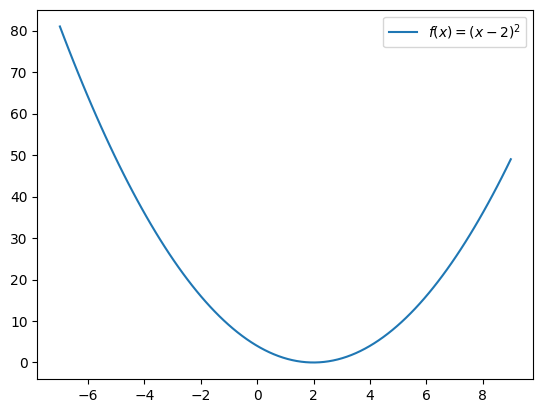

In [24]:
import seaborn as sns


def f(x):
    return torch.pow((x - 2.0), 2)


x_axis_vals = np.linspace(-7, 9, 100)
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label="$f(x)=(x-2)^2$")


### Using gradients to minimize losses

In [25]:
def fP(x):
    return 2 * x - 4

<Axes: >

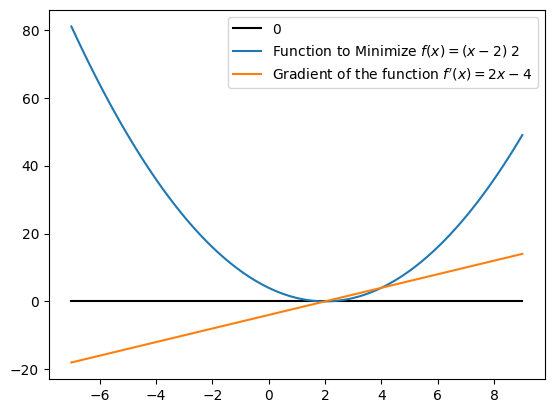

In [27]:
y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(
    x=x_axis_vals,
    y=[0.0] * len(x_axis_vals),
    label="0",
    color="black",
)
sns.lineplot(
    x=x_axis_vals,
    y=y_axis_vals,
    label="Function to Minimize $ f(x) = (x-2) ^ 2$ ",
)
sns.lineplot(
    x=x_axis_vals,
    y=y_axis_vals_p,
    label="Gradient of the function $ f'(x)=2 x - 4 $",
)

In [28]:
x = torch.tensor([-3.5], requires_grad=True)
print(x.grad)

None


In [29]:
value = f(x)
print(value)

tensor([30.2500], grad_fn=<PowBackward0>)


In [30]:
value.backward()

In [31]:
print(x.grad)

tensor([-11.])


In [32]:
x = torch.tensor([-3.5], requires_grad=True)

In [43]:
x_cur = x.clone()
x_prev = x_cur * 100
epsilon = 1e-5
eta = 0.1


In [44]:
while torch.linalg.norm(x_cur - x_prev) > epsilon:
    x_prev = x_cur.clone()

    value = f(x)
    value.backward()
    x.data -= eta * x.grad

    x.grad.zero_()

    x_cur = x.data

print(x_cur)


tensor([2.0000])


### Optimizing parameters

In [46]:
x_param = torch.nn.Parameter(torch.tensor([3.5]), requires_grad=True)
optimizer = torch.optim.SGD([x_param], lr=eta)


In [47]:
for epoch in range(60):
    optimizer.zero_grad()
    loss_incurred = f(x_param)
    loss_incurred.backward()
    optimizer.step()

print(x_param.data)


tensor([2.0000])


El código de arriba es mucha más limpio y automatizado que el anterior, x_param se va actualizando cada vez que se calculan los gradientes y se ejecuta el optimizer.

### Loading dataset object

In [48]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml


In [49]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
print(X.shape)

/home/mike/miniconda3/envs/huggin/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


In [72]:
X = X.to_numpy()
y = y.to_numpy()


In [74]:
class SimpleDataset(Dataset):
    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y

    def __getitem__(self, index):
        # This "work" could have gone in the constructor, but you should get into
        inputs = torch.tensor(self.X[index, :], dtype=torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return inputs, targets

    def __len__(self):
        return self.X.shape[0]


# Now we can make a PyTorch dataset
dataset = SimpleDataset(X, y)

In [75]:
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape)
print("Label of index 0: ", label)


Length:  70000
Features:  torch.Size([784])
Label of index 0:  tensor(5)


In [79]:
import plotly.express as px

fig = px.imshow(example.reshape((28, 28)))
fig.show()

### Creating a training and testing split

In [80]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size

In [81]:
train_dataset, test_dataset = torch.utils.data.random_split(
    dataset, (train_size, test_size)
)
print(f"{train_size} examples for training and {test_size} for testing")


56000 examples for training and 14000 for testing
